# Supervised Learning: Classification

## Using Decision Tree Model in scikit-learn

### Acknowledgements: Usman Alim 



Further Reading:

* `scikit-learn`: [user guide](https://scikit-learn.org/stable/user_guide.html).
* `The Iris Flower dataset`: [description](https://archive.ics.uci.edu/ml/datasets/iris). # it's a classic one to use for ML
* `Decision Tree` is a model used in supervised learning: [documentation](https://scikit-learn.org/stable/modules/tree.html).


## Quick Overview of scikit-learn

- [`scikit-learn`](https://scikit-learn.org/stable/) is the main machine learning library in the Python data science ecosystem.
- Implements many supervised (classification, regression) and unsupervised (clustering, density estimation, dimensionality reduction) learning algorithms.
- Relies heavily on `numpy`. Inputs and outputs are numpy arrays.
- Input data are expected to be $n \times D$ numerical arrays where $n$ is the number of observations, and $D$ is the number of features.
- Some feature wrangling may be needed, provides methods for feature extraction. 

# Predicting Iris Flowers
- Goal is to train a machine learning model (in this case, the decision tree model) to recognize types of iris flowers
- The dataset has three types of iris flowers: Iris Setosa, Iris Versicolour, Iris Virginica
- There are 150 examples in the dataset, and we will use a portion of it for training the model, and the rest for testing model accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [99]:
# # load the dataset from the url into pandas dataframe
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'label']
data = pd.read_csv('train.csv')
p_data = p_data.drop(p_data.columns[7], axis=1)
p_data = p_data[p_data['Type'] != 'South Dakota']

display(data)

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


In [100]:
# Data cleaning
p_data = pd.DataFrame(columns=['Tweet', 'following', 'followers', 'actions', 'is_retweet', 'location', 'Type'])
p_data = p_data.append(data)

C:\Users\faii_\AppData\Local\Temp\ipykernel_2152\3839881012.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_data = p_data.append(data)


In [56]:
# p_data['Tweet'] = data['Tweet'].str.replace('[^a-zA-Z]', ' ')
# p_data

In [55]:
# p_data['Tweet'] = p_data['Tweet'].apply(lambda x: x.lower())
# p_data

In [72]:
from nltk.stem import SnowballStemmer
import string

stopwords = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
# data['Tweet'] = p_data['Tweet'].apply(word_tokenize)

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords and stem words
    words = [stemmer.stem(word) for word in text.split() if word not in stopwords]
    return ' '.join(words)

p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)

In [101]:
import string


def preprocess_text(raw_tweet):
    # Remove punctuation
    new_string = []
    for word in raw_tweet:
        # Check if the word is a URL
        if "https://" in word or "http://" in word:
            new_string.append(word)
        else:
            word = re.sub(r"[^A-Za-z0-9.\-]", " ", word)
            new_string.append(word)

    # Join the list of words into a string
    string1 = "".join(new_string)
    
    # Replace multiple spaces with a single space
    string1 = re.sub(r"\s+", " ", string1)
    
#     # Remove leading and trailing spaces
#     string1 = string1.strip()
    
    # Convert to lowercase
    string1 = string1.lower()

    return string1

p_data['preprocessed_text'] = p_data['Tweet'].apply(preprocess_text)

In [139]:
p_data

,Tweet,following,followers,actions,is_retweet,location,Type,preprocessed_text
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,good morning love leebrown v
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,realdonaldtrump usnavy rip to heroes
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,haven t been following the news but i understa...
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,pic.twitter.com dy9q4ftlhz what to do with pap...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,didyouknow mahatma gandhi made a brief visit ...
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,allwentwrongwhen i told my hair stylist to go...
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,they don t have to like you and you don t have...
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,miami graham nash live at parker playhouse local
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,bethannhamilton is in the business of one-upp...


In [140]:
p_data['preprocessed_text'].head(20)

0                          good morning love leebrown v
1                 realdonaldtrump usnavy rip to heroes 
2     haven t been following the news but i understa...
3     pic.twitter.com dy9q4ftlhz what to do with pap...
4      didyouknow mahatma gandhi made a brief visit ...
5      amms samantha bee tries to attack trump inste...
6     please don t talk about me like that i m only ...
7     politicshttps twitter.com ngunjiriwambugu stat...
8     banking on brexit is it time to invest in the ...
9     they are serving and protecting 5wordregrets h...
10                            beauty is not in the face
11                           dancing for your pleasure.
12    americas most forgotten families speak out we ...
13     icantbeurfriendbecause it s better to be alon...
14     sextingwentwrongwhen i tried to text mcdonald...
15     occupythebay13 breakingnews blacklivesmatter ...
16    your social calendar in chicago bohemian house...
17    i keep up with the kardashians because... 

In [141]:
# Get the feature('Tweet') and lable ('Type') data from a Training and Test dataset
# We use 60% of the dataset to train a model, and use the rest to test the model predictions

X_train, X_test, y_train, y_test = train_test_split(p_data['preprocessed_text'], p_data['Type'], test_size=.20)

In [142]:
# Initialize the vectorizer with desired parameters
vectorizer = CountVectorizer(max_features=1000)


# Fit and transform the preprocessed text
vectorized_tweet_train = vectorizer.fit_transform(X_train)
vectorized_tweet_test = vectorizer.transform(X_test)

In [143]:
# Train a Naive Bayes classifier on the vectorized text
nb = MultinomialNB()
nb.fit(vectorized_tweet_train, y_train)


# score = nb.score(vectorized_tweet_test, y_test)
# print("Accuracy: {:.2f}%".format(score * 100))

MultinomialNB()

In [144]:
# Use the trained classifier to make predictions on the vectorized new text data
pred_labels = nb.predict(vectorized_tweet_test)


In [145]:
# Compute the accuracy score of the predicted labels
accuracy = accuracy_score(y_test, pred_labels)

print(pred_labels)

print("Accuracy: ", accuracy_score(y_test, pred_labels) * 100)

['Quality' 'Spam' 'Spam' ... 'Quality' 'Quality' 'Quality']
Accuracy:  88.69127516778524


In [146]:
score = nb.score(vectorized_tweet_test, y_test)
print("Accuracy: {:.2f}%".format(score * 100))

Accuracy: 88.69%


# Visualizing the results

- We can visualize the results using a confusion matrix
- The confusion matrix tells us exactly how many of each type of flowers the model predicted and what the correct answers are

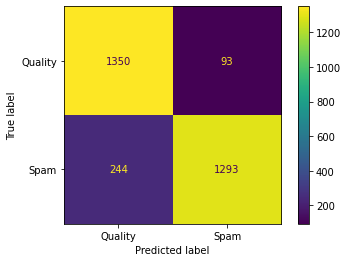

In [147]:
cm = confusion_matrix(y_test, pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

plt.show()

In [148]:
# read the Test data

unseen_data = pd.read_csv('test.csv')

#  add column fot processing the tweet data.


unseen_data['preprocessed_text'] = unseen_data['Tweet'].apply(preprocess_text)

unSeen_X_test = unseen_data['preprocessed_text']
v_unseen_tweet = vectorizer.transform(unSeen_X_test)

unseen_data


,Id,Tweet,following,followers,actions,is_retweet,location,preprocessed_text
0,0,"Cops shoot blacks almost everyday, and there a...",5509.0,5977.0,8062.0,1,ですpacito,cops shoot blacks almost everyday and there ar...
1,1,"#HAPPYTAEYANGDAY Oppa,happy birthday to you, ...",0.0,0.0,NaN,0,NaN,happytaeyangday oppa happy birthday to you pi...
2,2,RT @HoneyBadger10: Panthers in the super bowl....,471.0,229.0,747.0,0,"B'klyn, NYC, LA",rt honeybadger10 panthers in the super bowl. b...
3,3,Sorry my Twitter keeps posting my retweets a m...,0.0,79800.0,48.0,0,NaN,sorry my twitter keeps posting my retweets a m...
4,4,Heart attack causes and symptoms are different...,902.0,5797.0,4270.0,0,Chicago,heart attack causes and symptoms are different...
...,...,...,...,...,...,...,...,...
780,780,New Project For NLex Please @DreamscapePH @abs...,0.0,0.0,0.0,0,NaN,new project for nlex please dreamscapeph abscb...
781,781,Actor DiCaprio joins growing movement to dives...,8753.0,12323.0,9023.0,0,United States,actor dicaprio joins growing movement to dives...
782,782,Just overheard 'looping in' 'reaching out' and...,45.0,49.0,60.0,1,United Kingdom,just overheard looping in reaching out and sup...
783,783,Photoshoot time! #music #band #photoshootpic.t...,0.0,0.0,0.0,0,"Southampton, England",photoshoot time music band photoshootpic.twitt...


# Fill in missing labels

- If we have a new example with no label, or an existing example with missing label, We can use the trained model to predict the label for this example

In [75]:
# # use the model to make predictions on the test data
# print("Predicting labels of the test data set - %i examples" % (len(X_test)))
# Y_pred = clf.predict(X_test)

# print(Y_pred)

# print("Accuracy: ", accuracy_score(Y_test, Y_pred))


In [149]:
pred_labels_2 = nb.predict(v_unseen_tweet)

One thing to note is that there are random elements in this entire process.
- When splitting the dataset into training and test, the split is random, so the examples used to train the model are different each time you run
- The training of the model itself also contains random elements

You may run this notebook a few times and observe how the results change each time. This is the reason in machine learning, you would never just train your model once and report the accuracy. You may have gotten lucky that one time!

In [150]:
unseen_data['Type_NB'] = pred_labels_2

In [151]:
unseen_data

,Id,Tweet,following,followers,actions,is_retweet,location,preprocessed_text,Type_NB
0,0,"Cops shoot blacks almost everyday, and there a...",5509.0,5977.0,8062.0,1,ですpacito,cops shoot blacks almost everyday and there ar...,Spam
1,1,"#HAPPYTAEYANGDAY Oppa,happy birthday to you, ...",0.0,0.0,NaN,0,NaN,happytaeyangday oppa happy birthday to you pi...,Quality
2,2,RT @HoneyBadger10: Panthers in the super bowl....,471.0,229.0,747.0,0,"B'klyn, NYC, LA",rt honeybadger10 panthers in the super bowl. b...,Spam
3,3,Sorry my Twitter keeps posting my retweets a m...,0.0,79800.0,48.0,0,NaN,sorry my twitter keeps posting my retweets a m...,Quality
4,4,Heart attack causes and symptoms are different...,902.0,5797.0,4270.0,0,Chicago,heart attack causes and symptoms are different...,Spam
...,...,...,...,...,...,...,...,...,...
780,780,New Project For NLex Please @DreamscapePH @abs...,0.0,0.0,0.0,0,NaN,new project for nlex please dreamscapeph abscb...,Quality
781,781,Actor DiCaprio joins growing movement to dives...,8753.0,12323.0,9023.0,0,United States,actor dicaprio joins growing movement to dives...,Spam
782,782,Just overheard 'looping in' 'reaching out' and...,45.0,49.0,60.0,1,United Kingdom,just overheard looping in reaching out and sup...,Quality
783,783,Photoshoot time! #music #band #photoshootpic.t...,0.0,0.0,0.0,0,"Southampton, England",photoshoot time music band photoshootpic.twitt...,Quality


In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Vectorize tweets using TfidfVectorizer
tfid_vectorizer = TfidfVectorizer()
X_test_SVC = tfid_vectorizer.fit_transform(p_data['preprocessed_text'])


In [165]:
# Split data into training and testing sets
# random_state = 50 gave us the best accuracy so far. tried varies mubers like (30 = 50), 35, 42, 45, 55 and 60 
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_test_SVC, p_data['Type'], test_size=0.2, random_state=50)

# Train SVM model
clf = SVC(kernel='linear', C=1, gamma='auto')
clf.fit(X_train_S, y_train_S)

pred_Y_S = clf.predict(X_test_S)

# Evaluate model
accuracy = accuracy_score(y_test_S, pred_Y_S)
print("Accuracy:", accuracy * 100)

Accuracy: 91.71140939597315


In [172]:
X_tfidfVec = tfid_vectorizer.transform(unseen_data['preprocessed_text'])

unseen_data['Type_SVC'] = clf.predict(X_tfidfVec)
unseen_data.head(100)

,Id,Tweet,following,followers,actions,is_retweet,location,preprocessed_text,Type_NB,Type_SVC
0,0,"Cops shoot blacks almost everyday, and there a...",5509.0,5977.0,8062.0,1,ですpacito,cops shoot blacks almost everyday and there ar...,Spam,Spam
1,1,"#HAPPYTAEYANGDAY Oppa,happy birthday to you, ...",0.0,0.0,NaN,0,NaN,happytaeyangday oppa happy birthday to you pi...,Quality,Quality
2,2,RT @HoneyBadger10: Panthers in the super bowl....,471.0,229.0,747.0,0,"B'klyn, NYC, LA",rt honeybadger10 panthers in the super bowl. b...,Spam,Spam
3,3,Sorry my Twitter keeps posting my retweets a m...,0.0,79800.0,48.0,0,NaN,sorry my twitter keeps posting my retweets a m...,Quality,Quality
4,4,Heart attack causes and symptoms are different...,902.0,5797.0,4270.0,0,Chicago,heart attack causes and symptoms are different...,Spam,Spam
...,...,...,...,...,...,...,...,...,...,...
95,95,"BREAKING : One Dead, 19 Injured in VA, State o...",1.0,22.0,3218.0,0,"Southampton, England",breaking one dead 19 injured in va state of em...,Spam,Spam
96,96,Slain Florida priest had asked for mercy for h...,5951.0,60592.0,47041.0,0,天朝：星霜之下 逆势择天,slain florida priest had asked for mercy for h...,Spam,Spam
97,97,Tbh all of medicine needs to get on board with...,525.0,682.0,1340.0,1,The Republic of South Africa,tbh all of medicine needs to get on board with...,Spam,Spam
98,98,Woman pays it forward to Baldwin Village frien...,9010.0,18499.0,13974.0,0,"Anfield, Liverpool",woman pays it forward to baldwin village frien...,Spam,Spam
